In [10]:
import random

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [11]:

def trial(k, pi, pmax, n, m):
    '''Run a polya's urn simulation with n time-steps, m trials, k balls back,
        and p/pmax initial balls with class p. Returns average proportion of p
        over all trials.
    '''
    average = 0
    for i in range(m):
        p = pi
        for j in range(n + 1):
            if p >= random.randint(1, pmax + k*j):
                p += 1
        average += p/(pmax + k*(n + 1))
    return average/m

def simulate(kmax, pmax, n, m):
    ''' Iterate over trials with various inital conditions. Return a matrix of outcomes.
    '''
    data = np.zeros((pmax, kmax)) # Default float 64 is good.
    for k in range(kmax):
        for p in range(pmax):
            data[p, k] = trial(k, p, pmax, n, m)
    return data

In [12]:

def plot3d(data, pmax, kmax):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    X = []
    Y = []

    for i in range(kmax):
        for j in range(pmax):
            X.append(j)
    for i in range(pmax):
        for j in range(kmax):
            Y.append(i)

    Z = np.reshape(data, (pmax*kmax))

    ax.scatter(X, Y, Z, c = Z, marker = 'o', cmap = cm.Reds)
    ax.set_xlabel('P/Pmax')
    ax.set_ylabel('K')
    ax.set_zlabel('Average P')

    plt.show()

def plot2d(data, pmax, kmax):
    X = []
    Y = []
    for i in range(kmax):
        for j in range(pmax):
            X.append(j)
    for i in range(pmax):
        for j in range(kmax):
            Y.append(i)

    Z = np.reshape(data, (pmax*kmax))

    plt.scatter(X, Y, c = Z, marker = 'o', cmap = cm.Reds)

    plt.show()

In [13]:
data = simulate(100, 100, 5, 5)

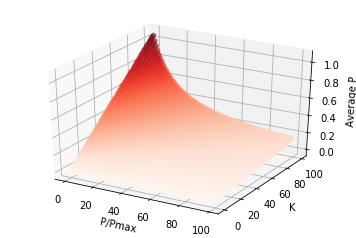

In [16]:
plot3d(data, 100, 100)

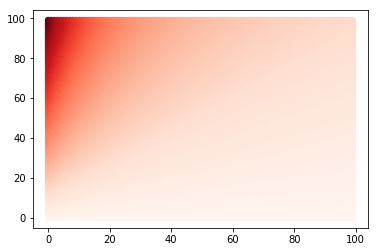

In [15]:
plot2d(data, 100, 100)